<a href="https://colab.research.google.com/github/Min0627/Data-Science-Project-2/blob/main/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT 2 - DATA SCIENCE (STQD6014)

MUHAMMAD AMIN KHALILI BIN MOHD NOOR BIHISHAM (P158145)

#Happiness Data Analysis (2011-2024)

Data Sets: (https://docs.google.com/spreadsheets/d/1sz0Np9rTvwsp6r1W_S25gkLMtURZLylc/edit?usp=sharing&ouid=105058162430113252081&rtpof=true&sd=true)


**Intoduction**

This analysis explores the World Happiness Report dataset spanning from 2011 to 2024. The report ranks countries based on their happiness levels using factors like GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Understanding these rankings and their contributing factors can provide valuable insights into global well-being trends and the elements that contribute to a nation's happiness.



Problem Statement

1.   Clean and prepare the happiness dataset for analysis.
2.   Visualize key patterns and trends in global happiness over time.
3.   Examine how different factors contribute to national happiness scores.
4.   Identify countries with significant changes in happiness rankings.
5.   Compare regional happiness trends.


#DATA CLEANING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import Tab, Output, VBox
from IPython.display import display


#Read dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/project_2/Data_Happiness (2011- 2024).xlsx'
happy = pd.read_excel(file_path)

#Display Info
print("\n")
print("-"*60)
print("Dataset Info".center(60))
print("-"*60)
print(happy.info())

# Display first 5
print("\n")
print("-"*180)
print("First 5 Countries in 2024".center(180))
print("-"*180)
happy[happy['Year'] == 2024].sort_values('Rank').head(5)

Mounted at /content/drive


------------------------------------------------------------
                        Dataset Info                        
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Ladder score                                1969 non-null   float64
 4   upperwhisker                                875 non-null    float64
 5   lowerwhisker                                875 non-null    float64
 6   Explained by: Log GDP per capita            872 non-null    float64
 7   Explained by: Social

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [ ]:
#Check missing values
print("-"*40)
print("Missing Values".center(40))
print("-"*40)
print(happy.isnull().sum())
print("\n")

#Clean column
happy.columns = happy.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '').str.replace('.', '').str.replace('+', '')
print(happy.columns)
print("\n")

#Fill in
happy.fillna(method='ffill', inplace=True)

#Year to Int
happy['year'] = happy['year'].astype(int)

#Fill values in lower/upper and remaining values fill with median
happy['upperwhisker'] = happy['upperwhisker'].fillna(happy['ladder_score'])
happy['lowerwhisker'] = happy['lowerwhisker'].fillna(happy['ladder_score'])

factor_columns = ['explained_by_log_gdp_per_capita', 'explained_by_social_support', 'explained_by_healthy_life_expectancy', 'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
                  'explained_by_perceptions_of_corruption', 'dystopia__residual']

for col in factor_columns:
    happy[col] = happy.groupby('country_name')[col].transform(lambda x: x.fillna(x.median()))

for col in factor_columns:
    happy[col] = happy[col].fillna(happy[col].median())

print(happy.isnull().sum())

----------------------------------------
             Missing Values             
----------------------------------------
Year                                             0
Rank                                             0
Country name                                     0
Ladder score                                     0
upperwhisker                                  1094
lowerwhisker                                  1094
Explained by: Log GDP per capita              1097
Explained by: Social support                  1097
Explained by: Healthy life expectancy         1099
Explained by: Freedom to make life choices    1098
Explained by: Generosity                      1097
Explained by: Perceptions of corruption       1098
Dystopia + residual                           1101
dtype: int64


Index(['year', 'rank', 'country_name', 'ladder_score', 'upperwhisker',
       'lowerwhisker', 'explained_by_log_gdp_per_capita',
       'explained_by_social_support', 'explained_by_healthy_life_expec

<ipython-input-2-4132710402>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  happy.fillna(method='ffill', inplace=True)


year                                         0
rank                                         0
country_name                                 0
ladder_score                                 0
upperwhisker                                 0
lowerwhisker                                 0
explained_by_log_gdp_per_capita              0
explained_by_social_support                  0
explained_by_healthy_life_expectancy         0
explained_by_freedom_to_make_life_choices    0
explained_by_generosity                      0
explained_by_perceptions_of_corruption       0
dystopia__residual                           0
dtype: int64


#Result and Discussion

In [ ]:
# Display top 10 in 2024 and sort by rank
print("\n")
print("-"*180)
print("Top 10 Country in 2024".center(180))
print("-"*180)
happy[happy['year'] == 2024].sort_values('rank').head(10)



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                               Top 10 Country in 2024                                                                               
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,year,rank,country_name,ladder_score,upperwhisker,lowerwhisker,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
71,2024,6,Costa Rica,7.274,7.361,7.187,1.492,1.600,0.680,0.948,0.067,0.118,2.369
84,2024,7,Norway,7.262,7.353,7.171,1.902,1.711,0.863,0.962,0.168,0.425,1.231
97,2024,8,Israel,7.234,7.301,7.168,1.695,1.743,0.824,0.740,0.144,0.193,1.895
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
122,2024,10,Mexico,6.979,7.068,6.889,1.435,1.504,0.550,0.879,0.057,0.118,2.438


In [ ]:
#slider
year_slider = widgets.IntSlider(
    min=2011,
    max=2024,
    step=1,
    value=2024,
    description='Year:'
)

#function
def update_top_countries(year):
    plt.figure(figsize=(10, 6))
    top_data = happy[happy['year'] == year].sort_values('ladder_score', ascending=False).head(10)
    sns.barplot(
        data=top_data,
        y='country_name',
        x='ladder_score',
        palette='viridis'
    )

    for i, score in enumerate(top_data['ladder_score']):
         plt.text(
            score - 0.15,  # x-position (left-aligned inside bar)
            i,            # y-position (matches bar)
            f"{score:.3f}",  # Score with 3 decimal places
            color='black',
            va='center',
            fontsize=10,
            fontweight='bold'
        )
    plt.title(f'Top 10 Happiest Countries ({year})')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_top_countries, year=year_slider)

interactive(children=(IntSlider(value=2024, description='Year:', max=2024, min=2011), Output()), _dom_classes=…

##Distribution of Happiness Scores Over Time



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                               Distribution of Happiness Scores Over Time (Box Plot)                                                                
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<ipython-input-5-1226570245>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='ladder_score', data=happy, palette='viridis')


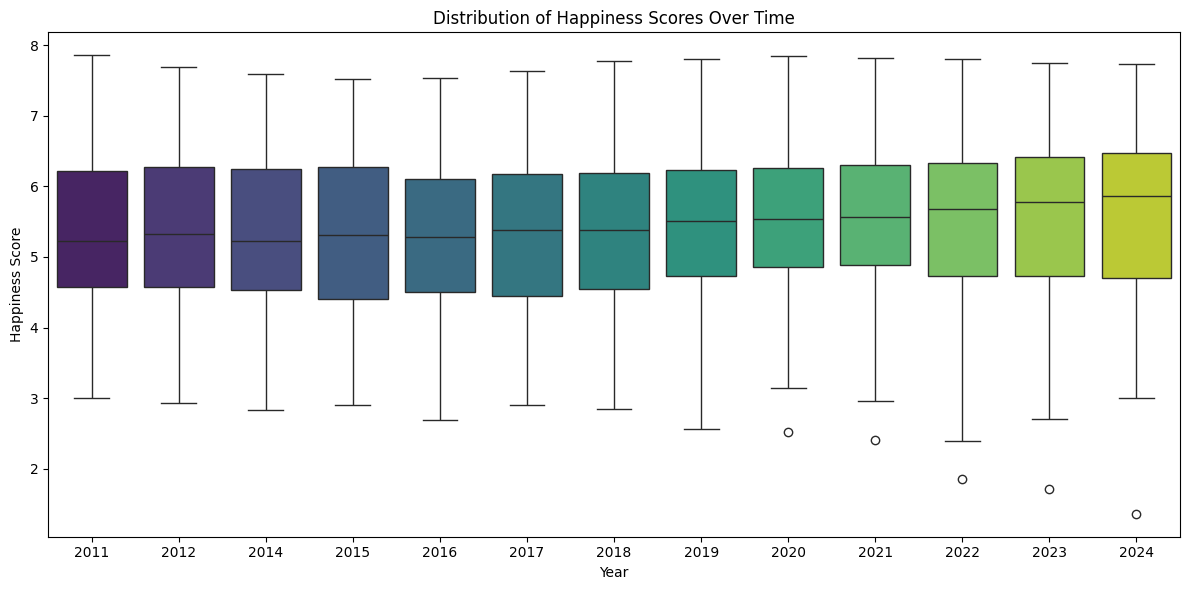

In [ ]:
#Box plot
print("\n")
print("-"*180)
print("Distribution of Happiness Scores Over Time (Box Plot)".center(180))
print("-"*180)

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='ladder_score', data=happy, palette='viridis')
plt.title('Distribution of Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

##Happiness Trends over Time

In [ ]:
#sorted countries
countries = sorted(happy['country_name'].unique())

# Dropdown widget
country_dropdown = widgets.Dropdown(
    options=countries,
    value='Malaysia',
    description='Country:',
    layout={'width': '300px'}
)

#data labels
def update_trend(country):
    plt.figure(figsize=(10, 6))

    country_data = happy[happy['country_name'] == country].sort_values('year')

    #plot
    sns.lineplot(
        data=country_data,
        x='year',
        y='ladder_score',
        marker='o',
        markersize=8,
        linewidth=2,
        color='steelblue'
    )

    # Add data labels
    for _, row in country_data.iterrows():
        plt.text(
            row['year'],  # x-position
            row['ladder_score'] + 0.01,  # y-position (slightly above point)
            f"{row['ladder_score']:.2f}",  # Formatted score
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
        )

    plt.title(f'Happiness Trend: {country}', pad=15)
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_trend, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', index=91, layout=Layout(width='300px'), options=('Afgha…

##Happiness Trends Comparisons

In [ ]:
# Get sorted countries
countries = sorted(happy['country_name'].unique())

# Create interactive controls
country_checks = [widgets.Checkbox(description=country, value=False) for country in countries[:]]
select_all = widgets.Button(description="Select All")
clear_all = widgets.Button(description="Clear All")
compare_button = widgets.Button(description="Compare Selected", button_style='success')

# Organize controls in a scrollable box
checkboxes = widgets.VBox([
    widgets.HBox([select_all, clear_all]),
    widgets.VBox(country_checks,
                layout=widgets.Layout(height='300px', overflow_y='scroll'))
])

# Output area for the plot
plot_output = widgets.Output()

def update_plot(_):
    with plot_output:
        plot_output.clear_output(wait=True)

        selected = [box.description for box in country_checks if box.value]
        if not selected:
            print("Please select at least 1 country")
            return

        plt.figure(figsize=(12, 7))
        palette = sns.color_palette("husl", len(selected))

        # Plot each selected country
        for i, country in enumerate(selected):
            country_data = happy[happy['country_name'] == country].sort_values('year')
            plt.plot(
                'year', 'ladder_score',
                data=country_data,
                marker='o',
                markersize=8,
                linewidth=2,
                color=palette[i],
                label=country
            )

            # Add value labels
            for _, row in country_data.iterrows():
                plt.text(
                    row['year'],
                    row['ladder_score'] + 0.03,
                    f"{row['ladder_score']:.2f}",
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2),
                    color=palette[i]
                )

        # Customize plot
        plt.title('Happiness Trends Comparison', pad=20, fontsize=14)
        plt.xlabel('Year', labelpad=10)
        plt.ylabel('Happiness Score', labelpad=10)
        plt.grid(True, alpha=0.2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Button actions
def select_all_countries(_):
    for box in country_checks:
        box.value = True

def clear_all_countries(_):
    for box in country_checks:
        box.value = False

select_all.on_click(select_all_countries)
clear_all.on_click(clear_all_countries)
compare_button.on_click(update_plot)

# Display the interface
display(widgets.VBox([
    widgets.HTML("<h2>Select Countries to Compare (Max 5)</h2>"),
    widgets.HBox([
        checkboxes,
        plot_output
    ]),
    compare_button
]))


In [ ]:
# buttons for factor selection
factor_radio = widgets.RadioButtons(
    options=[
        'explained_by_log_gdp_per_capita',
        'explained_by_social_support',
        'explained_by_healthy_life_expectancy'
    ],
    description='Factor:'
)

#function
def update_correlation(factor):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=happy,
        x=factor,
        y='ladder_score',
        hue='year',
        palette='coolwarm',
        alpha=0.7
    )
    plt.title(f'Happiness vs. {factor.replace("_", " ").title()}')
    plt.xlabel(factor.replace('_', ' ').title())
    plt.ylabel('Happiness Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_correlation, factor=factor_radio)

interactive(children=(RadioButtons(description='Factor:', options=('explained_by_log_gdp_per_capita', 'explain…

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'happy' is your DataFrame with the happiness data

## 1. Create more user-friendly widgets
factor_radio = widgets.RadioButtons(
    options=[
        ('GDP per capita', 'explained_by_log_gdp_per_capita'),
        ('Social Support', 'explained_by_social_support'),
        ('Healthy Life Expectancy', 'explained_by_healthy_life_expectancy'),
        ('Freedom', 'explained_by_freedom_to_make_life_choices'),
        ('Generosity', 'explained_by_generosity'),
        ('Corruption Perception', 'explained_by_perceptions_of_corruption')
    ],
    description='Select Factor:',
    layout={'width': 'max-content'},
    style={'description_width': 'initial'}
)

year_slider = widgets.IntRangeSlider(
    value=[happy['year'].min(), happy['year'].max()],
    min=happy['year'].min(),
    max=happy['year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

region_dropdown = widgets.Dropdown(
    options=['All Regions'] + sorted(happy['region'].unique().tolist()),
    value='All Regions',
    description='Filter by Region:',
    disabled=False
)

size_toggle = widgets.ToggleButtons(
    options=[('Small', 20), ('Medium', 50), ('Large', 100)],
    description='Point Size:',
    tooltips=['Small points', 'Medium points', 'Large points']
)

# 2. Define the update function with better styling
def update_plot(factor, year_range, region, size):
    plt.figure(figsize=(12, 7))

    # Filter data based on selections
    filtered_data = happy[
        (happy['year'] >= year_range[0]) &
        (happy['year'] <= year_range[1])
    ]

    if region != 'All Regions':
        filtered_data = filtered_data[filtered_data['region'] == region]

    # Create the plot
    ax = sns.scatterplot(
        data=filtered_data,
        x=factor,
        y='ladder_score',
        hue='year',
        palette='viridis',
        size='year',
        sizes=(size, size*2),
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )

    # Add regression line
    sns.regplot(
        data=filtered_data,
        x=factor,
        y='ladder_score',
        scatter=False,
        color='red',
        line_kws={'linestyle':'--', 'alpha':0.5}
    )

    # Improve plot aesthetics
    plt.title(f'Happiness Score vs. {factor_radio.options[factor_radio.index][0]} (Years {year_range[0]}-{year_range[1]})',
              pad=20, fontsize=14)
    plt.xlabel(factor_radio.options[factor_radio.index][0], labelpad=10)
    plt.ylabel('Happiness Score', labelpad=10)

    # Format legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles[:len(filtered_data['year'].unique())],
        labels[:len(filtered_data['year'].unique())],
        title='Year',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    # Add grid and adjust layout
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 3. Create a layout container for better organization
controls = widgets.VBox([
    widgets.HBox([factor_radio, region_dropdown]),
    year_slider,
    size_toggle
])



# 5. Combine all elements
dashboard = widgets.VBox([
    description,
    controls,
    widgets.interactive_output(
        update_plot,
        {
            'factor': factor_radio,
            'year_range': year_slider,
            'region': region_dropdown,
            'size': size_toggle
        }
    )
])

# 6. Display the dashboard
display(dashboard)

KeyError: 'region'

#Conclusion